In [1]:
import pandas as pd
import  matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline
import numpy as np


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dd = df.isnull().sum()
(dd[dd>0])/(df.shape[0])*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

There is 3 columns with missing values : {Age, Cabin, Embarked}

In [5]:
label = {'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' :'Southampton'}
df['Embarked'].value_counts().index.to_series().replace(label)

S    Southampton
C      Cherbourg
Q     Queenstown
dtype: object

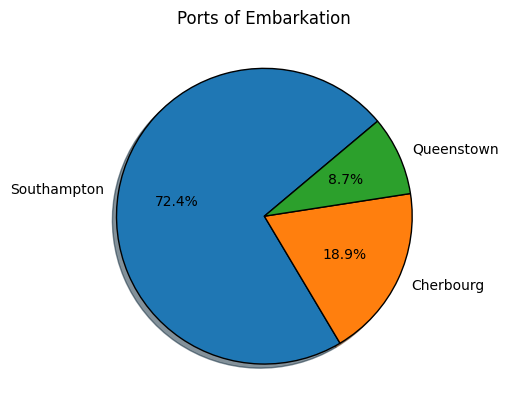

In [6]:

fin = df['Embarked'].value_counts().tolist()
plt.pie(fin,labels=df['Embarked'].value_counts().index.to_series().replace(label),wedgeprops={'edgecolor':'black'},
        shadow=True,
        startangle=40,
        autopct = '%1.1f%%')
plt.title("Ports of Embarkation")
plt.show()

In [7]:
df['Cabin'].unique()[:20]

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12'], dtype=object)

In [8]:
df.drop(columns=['Cabin','Ticket','Name','PassengerId','Embarked'],inplace=True)

In [9]:
df['Fare'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


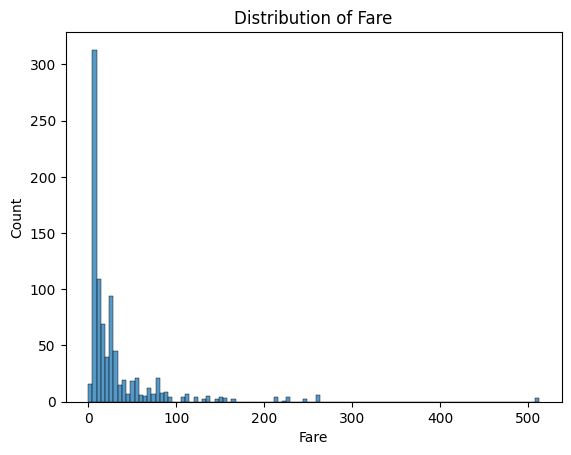

In [10]:
sns.histplot(data=df,x=df['Fare'])
plt.title("Distribution of Fare")
plt.show()

In [11]:
from scipy.stats import iqr
iqrr = iqr(df['Fare'])
q3 = np.quantile(df['Fare'],.90)
maxx= q3 + iqrr*1.5
maxx


112.5927

In [12]:
alotof_fare = df[df['Fare']>maxx]
alotof_fare[:10]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
27,0,1,male,19.0,3,2,263.0000
31,1,1,female,NaN,1,0,146.5208
88,1,1,female,23.0,3,2,263.0000
118,0,1,male,24.0,0,1,247.5208
195,1,1,female,58.0,0,0,146.5208
215,1,1,female,31.0,1,0,113.2750
258,1,1,female,35.0,0,0,512.3292
268,1,1,female,58.0,0,1,153.4625
269,1,1,female,35.0,0,0,135.6333
297,0,1,female,2.0,1,2,151.5500


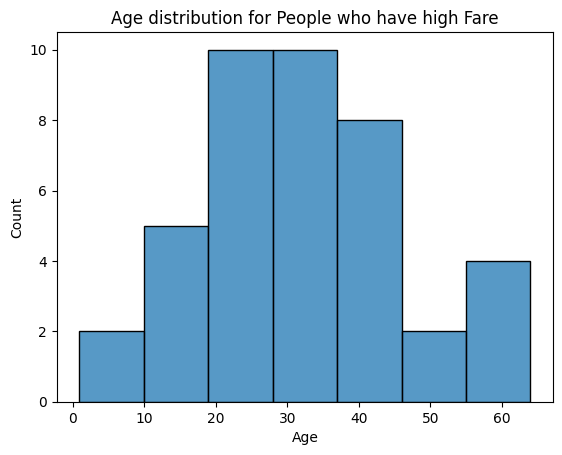

In [13]:
sns.histplot(data=alotof_fare,x='Age')
plt.title("Age distribution for People who have high Fare")
plt.show()

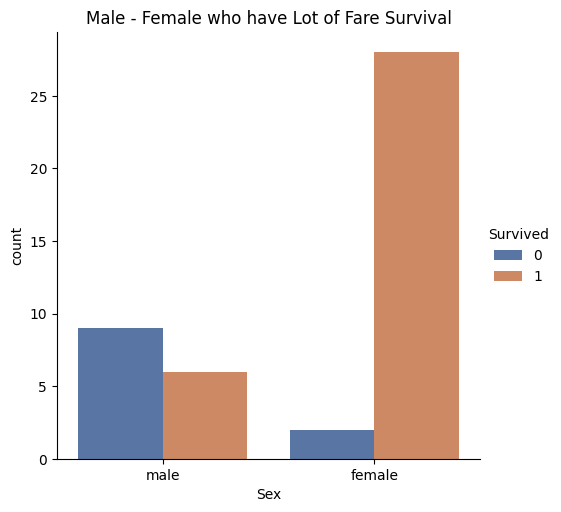

In [14]:
sns.catplot(data=alotof_fare,x='Sex',kind='count',hue='Survived',palette='deep')
plt.title("Male - Female who have Lot of Fare Survival")
plt.show()


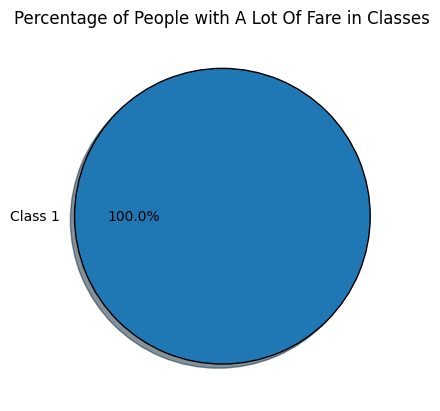

In [15]:
alotof_fare['Pclass'].value_counts()
plt.pie(alotof_fare['Pclass'].value_counts(),labels=['Class 1'],wedgeprops={'edgecolor':'black'},
        shadow=True,
        autopct = '%1.1f%%')
plt.title('Percentage of People with A Lot Of Fare in Classes')
plt.show()

In [16]:
df['Fare'] = df['Fare'].apply(lambda x : x if x< 1.5*maxx else 1.5*maxx) 

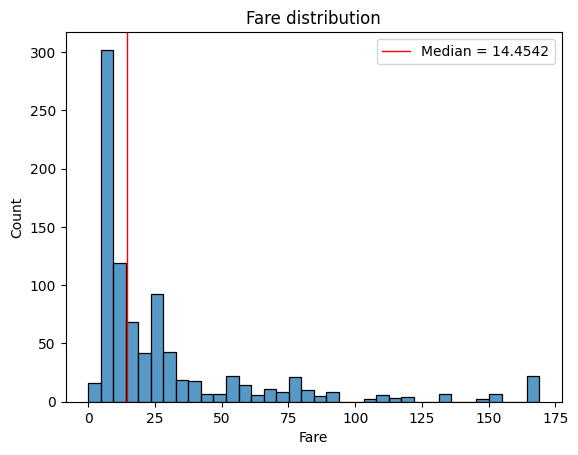

In [17]:
sns.histplot(data=df,x=df['Fare'])
plt.axvline(x=df['Fare'].median(),
            color='red',label=f"Median = {df['Fare'].median()}", linewidth=1)
plt.legend()
plt.title("Fare distribution")
plt.show()

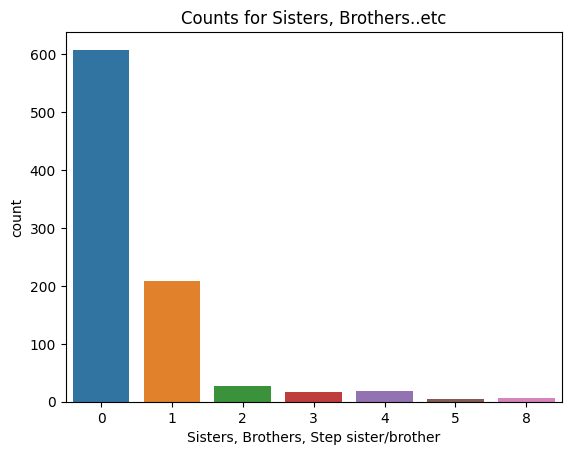

In [18]:
f1 = df['SibSp']
f1.value_counts()
sns.countplot(data=df,x=f1)
plt.title("Counts for Sisters, Brothers..etc")
plt.xlabel("Sisters, Brothers, Step sister/brother")
plt.show()

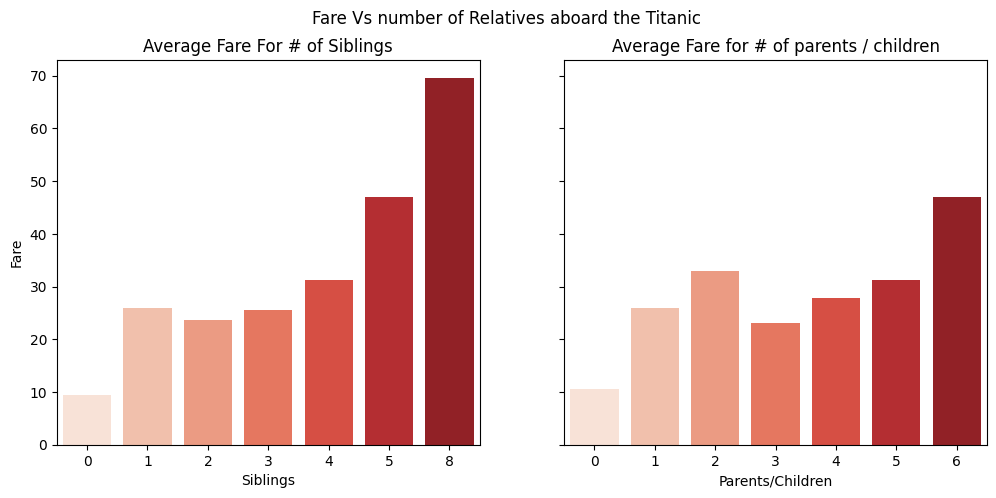

In [19]:
farebySib = df.groupby('SibSp')['Fare'].median().to_frame()
farebypar_child = df.groupby('Parch')['Fare'].median().to_frame()
fig ,axes = plt.subplots(1,2,sharey=True,figsize=(12,5))
sns.barplot(ax=axes[0] ,data=farebySib,x=farebySib.index,y='Fare',palette='Reds')
axes[0].set_title("Average Fare For # of Siblings")
axes[0].set_xlabel("Siblings")
sns.barplot(ax=axes[1] ,data=farebypar_child,x=farebypar_child.index,y='Fare',palette='Reds')
axes[1].set_title("Average Fare for # of parents / children")
axes[1].set_xlabel("Parents/Children")
axes[1].set_ylabel('')
fig.suptitle("Fare Vs number of Relatives aboard the Titanic")
plt.show()

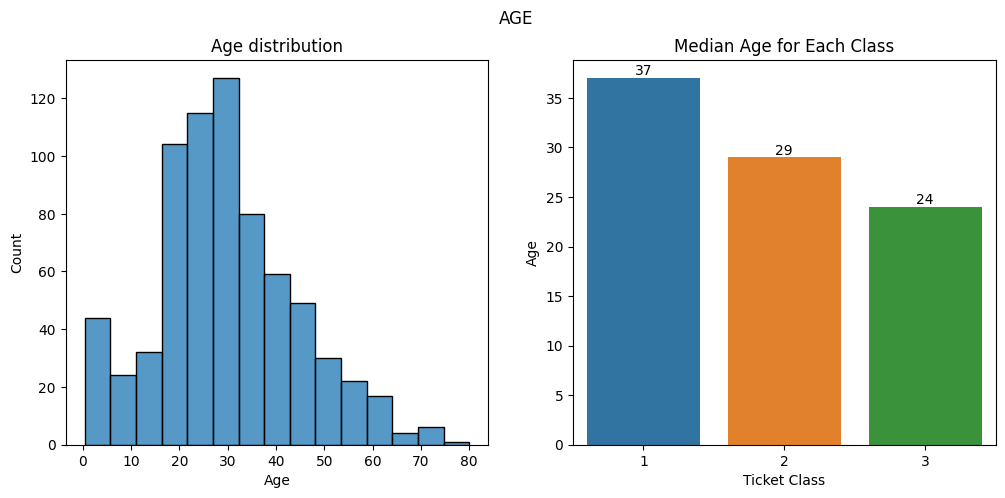

In [20]:
ages = df.groupby('Pclass')['Age'].median().to_frame()

fig,axes = plt.subplots(1,2,figsize=(12,5))

sns.histplot(ax = axes[0], data=df,x='Age',bins=15)
axes[0].set_title("Age distribution")

a = sns.barplot(ax = axes[1] ,data=ages,x=ages.index,y='Age')
for i in a.containers:
    a.bar_label(i,)

axes[1].set_title('Median Age for Each Class')
axes[1].set_xlabel("Ticket Class")

fig.suptitle("AGE")
plt.show()

In [21]:
ages.reset_index(inplace=True)
df['Age'] = df[['Age','Pclass']].apply( lambda x : ages['Age'][x['Pclass']-1] if (pd.isnull(x['Age'])) else x['Age'] ,axis=1)

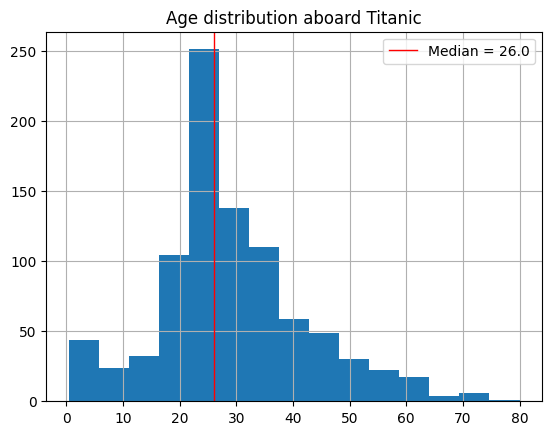

In [22]:
df['Age'].hist(bins=15)
plt.title("Age distribution aboard Titanic")
plt.axvline(x=df['Age'].median(),
            color='red',label=f"Median = {df['Age'].median()}", linewidth=1)
plt.legend()
plt.show()

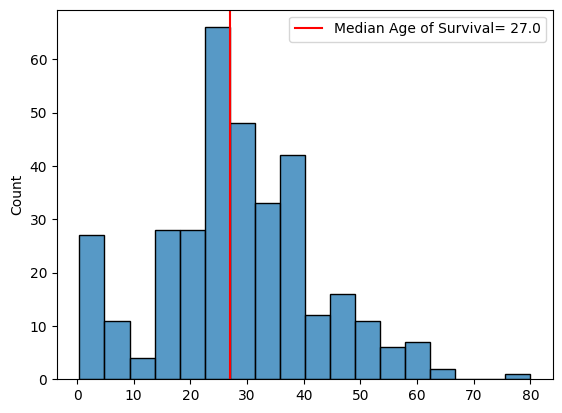

In [23]:

srv = df[['Age','Survived']].apply(lambda x : x['Age'] if x['Survived'] else None ,axis = 1 )
sns.histplot(data=srv)
plt.axvline(x = srv.median(),color='r',label=f"Median Age of Survival= {srv.median()}")
plt.legend()
plt.show()

C:\Users\Logo\AppData\Local\Temp\ipykernel_19852\4223867884.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


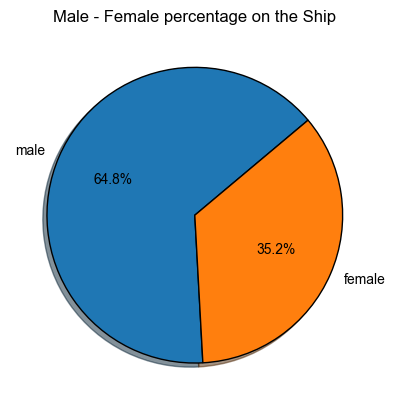

In [24]:
def pie(column_name):
    go = df[column_name].value_counts()
    goind = go.index
    plt.pie(go,labels=goind,wedgeprops={'edgecolor':'black'},
            shadow=True,
            startangle=40,
            autopct = '%1.1f%%')
    plt.style.use('seaborn')

plt.title("Male - Female percentage on the Ship")
pie('Sex')
plt.show()

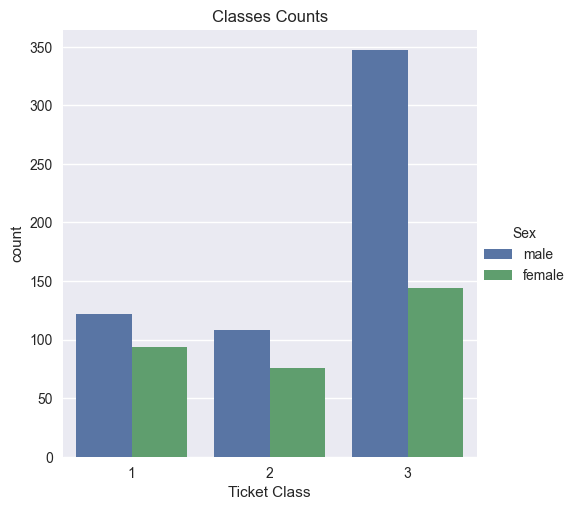

In [25]:
sns.catplot(data=df,x='Pclass',kind='count',hue='Sex')
plt.title("Classes Counts")
plt.xlabel("Ticket Class")
plt.show()

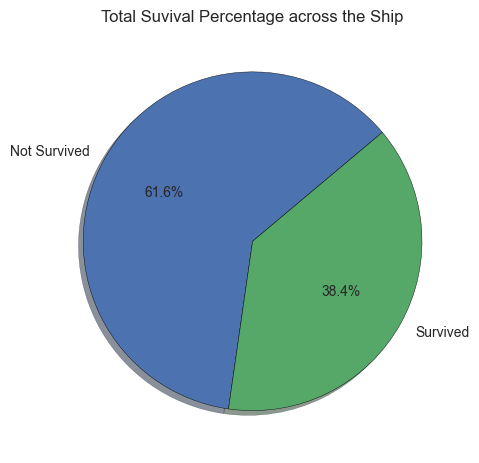

In [26]:
label = {0:'Not Survived',1:'Survived'}
plt.pie(df['Survived'].value_counts(),labels=df['Survived'].value_counts().index.to_series().replace(label),wedgeprops={'edgecolor':'black'},
        shadow=True,
        startangle=40,
        autopct = '%1.1f%%')
plt.title("Total Suvival Percentage across the Ship")
plt.show()

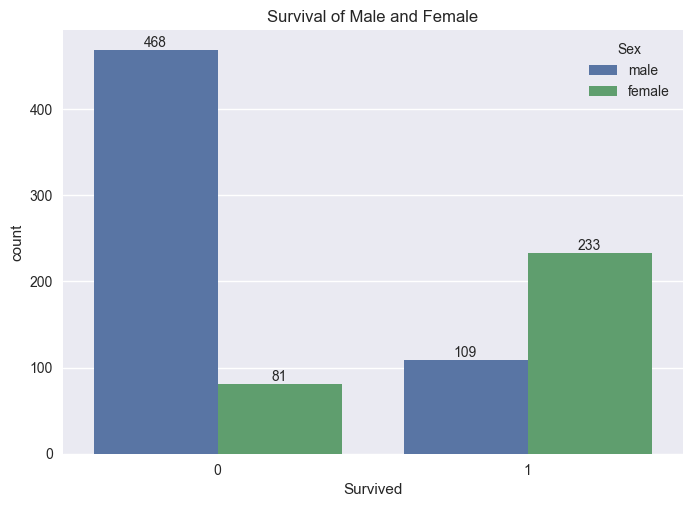

In [27]:
ax = sns.countplot(data=df,x='Survived',hue='Sex')

for container in ax.containers:
    ax.bar_label(container)

plt.title("Survival of Male and Female")
plt.show()

In [28]:
df['Sex'] = df['Sex'].apply(lambda x : 0 if x=='female' else 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30,   random_state=101)

In [30]:
model = LogisticRegression()
x_train = df.drop(columns=['Survived'])
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       154
           1       0.78      0.66      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



# colcolusion 
---

### Fare

- Fare is an important Factor in Survival .. so I focused at it for a while:
    - %100 of people with very very high Fare are on <font color = green >1st Class</font>
    - <font color = green >Womens</font> with high level of Fare most likely to servive unlike men
    - As number of <font color = green >Relatives</font> of the Person increase (Siblings or Parents/childer) as Fare increases
    

### Age 

- Age also has high impact
    - Median Age for Classes differ : <font color = green >Old people</font> found to be many of them in Class A (1st)
    - Average Age for whole ship is about <font color = green >26 years old</font>

### Sex

- Sex variation cuases some results:
    - Men is the most on the Ship specially on 3rd Class
    - Females normally distributed across three classes
    - <font color = green >Survived Females</font> are many compared to men


### Survival 

- At The End around <font color = green >%40</font> Survive from the sinking.